# Assignment 5 on MLflow
**Note**: It is recommended to use a virtual environment to run the same. Requirements can be found in the `requirements.txt` file. <br>
**Tip**: Refer to the [following blog](https://anbasile.github.io/posts/2017-06-25-jupyter-venv/) to learn more about using virtual environments and corresponding kernels in VSCode

In [20]:
# !pip install plot_keras_history
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import matplotlib.pyplot as plt
from plot_keras_history import show_history

## Getting the data

In [21]:
(X_train, Y_train), (X_test, Y_test) = keras.datasets.mnist.load_data()
num_classes = 10
x_train = X_train.reshape(60000, 784)
x_test = X_test.reshape(10000, 784)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape, 'train input samples')
print(x_test.shape, 'test input samples')

(60000, 784) train input samples
(10000, 784) test input samples


In [22]:
y_train = keras.utils.to_categorical(Y_train, num_classes)
y_test = keras.utils.to_categorical(Y_test, num_classes)
print(y_train.shape, 'train output samples')
print(y_test.shape, 'test output samples')

(60000, 10) train output samples
(10000, 10) test output samples


## Run a simple model to check if Keras is working properly

In [23]:
# let's try a basic neural network for digit classification
model = keras.Sequential()
model.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
model.add(layers.Dense(20, activation='sigmoid'))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_48 (Dense)                │ (None, 20)             │        15,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_49 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_50 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,330 (63.79 KB)

 Trainable params: 16,330 (63.79 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=3, validation_data=(x_test, y_test))


2024/04/21 09:26:48 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID 'c589ba549e54457d826849b0fd7eef17', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current keras workflow


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6106 - loss: 1.4855 - val_accuracy: 0.8924 - val_loss: 0.4077
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8995 - loss: 0.3701 - val_accuracy: 0.9164 - val_loss: 0.2915
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9182 - loss: 0.2862 - val_accuracy: 0.9285 - val_loss: 0.2484


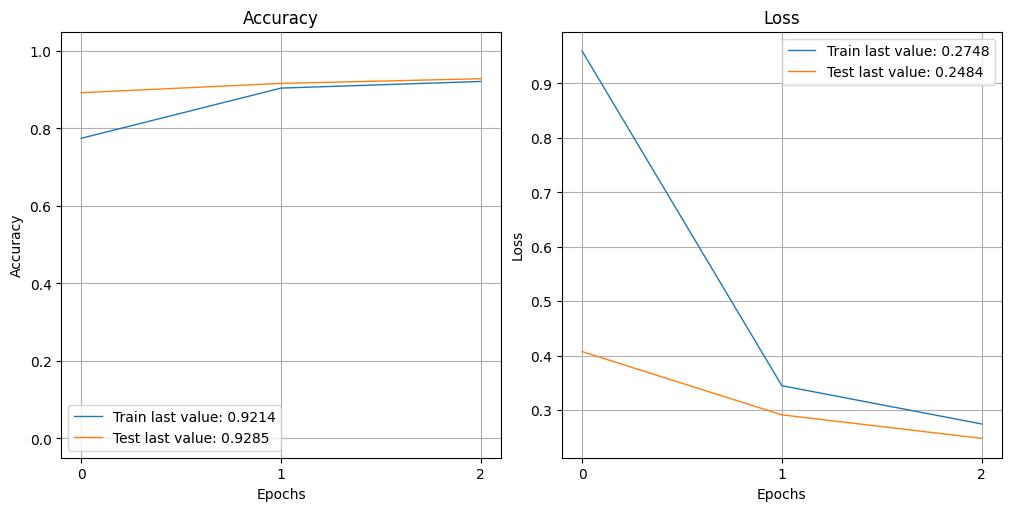

In [25]:
show_history(history)

In [26]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Test accuracy: {:5.2f}%".format(100*acc))
loss, acc = model.evaluate(x_train, y_train, verbose=2)
print("Train accuracy: {:5.2f}%".format(100*acc))

313/313 - 1s - 3ms/step - accuracy: 0.9285 - loss: 0.2484
Test accuracy: 92.85%
1875/1875 - 5s - 3ms/step - accuracy: 0.9304 - loss: 0.2466
Train accuracy: 93.04%


In [27]:
import numpy as np

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step
Predicted Digit: 3


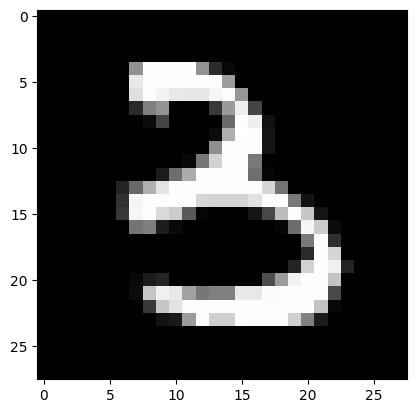

In [28]:
# check if the prediction is working fine for a random test point
test_pt = 782
plt.imshow(X_test[test_pt], cmap=plt.get_cmap('gray'))
probs = model.predict(x_test[test_pt:test_pt+1], verbose=True)
print("Predicted Digit:", np.argmax(probs))

# Define all the experiment variants

In [29]:
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import ModelCheckpoint
import h5py


class define_expt_variants:
    """
    Class which holds all the 10 required experimental variants
    Each variant differs by a minor configuation such as learning rates, model size, batch size etc.
    Each class method fits the model on the data and captures the history. However, the history is not returned
    """
    def __init__(self):
        pass

    def cfg_basic(self):
        """basic neural network for digit classification"""
        model_1 = keras.Sequential()
        model_1.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_1.add(layers.Dense(20, activation='sigmoid'))
        model_1.add(layers.Dense(10, activation='softmax'))

        model_1.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_1.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_1
    
    def cfg_bigger(self):
        """bigger model"""
        model_2 = keras.Sequential()
        model_2.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_2.add(layers.Dense(128, activation='sigmoid'))
        model_2.add(layers.Dense(10, activation='softmax'))

        model_2.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_2.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

        return model_2
    
    def cfg_regularised(self):
        """regularised model"""
        model_3 = keras.Sequential()
        model_3.add(layers.Dense(256, activation='sigmoid', input_shape=(784,), kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(128, activation='sigmoid', kernel_regularizer=regularizers.L2(0.01)))
        model_3.add(layers.Dense(10, activation='softmax'))

        model_3.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_3.fit(x_train, y_train, epochs=50, steps_per_epoch=50, validation_data=(x_test, y_test))

        return model_3
    
    def cfg_dropout(self):
        """model with dropout"""
        model_4 = keras.Sequential()
        model_4.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_4.add(Dropout(0.7))
        model_4.add(layers.Dense(128, activation='sigmoid'))
        model_4.add(Dropout(0.6))
        model_4.add(layers.Dense(10, activation='softmax'))

        model_4.compile(loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_4.fit(x_train, y_train, epochs=10)

        return model_4
    
    def cfg_early_stop(self):
        """model with early stopping callback"""
        model_5 = keras.Sequential()
        model_5.add(layers.Dense(256, activation='sigmoid', input_shape=(784,)))
        model_5.add(layers.Dense(128, activation='sigmoid'))
        model_5.add(layers.Dense(10, activation='softmax'))
        model_5.compile(loss='categorical_crossentropy', metrics=['accuracy'])
    
        # model_ will get saved at the end of every epoch automatically.
        checkpoint = ModelCheckpoint(r"mnist-epoch-{epoch:02d}.keras")
        history = model_5.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test), callbacks=[checkpoint])
        
        return model_5
    

    def cfg_lr_10(self):
        """model with a very high learning rate"""
        model_6 = keras.Sequential()
        model_6.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_6.add(layers.Dense(10, activation='sigmoid'))
        model_6.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=10.0)
        model_6.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_6.fit(x_train, y_train, epochs=20)

        return model_6
    
    def cfg_lr_1e_5(self):
        """model with very low learning rate"""
        model_7 = keras.Sequential()
        model_7.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_7.add(layers.Dense(10, activation='sigmoid'))
        model_7.add(layers.Dense(10, activation='softmax'))

        opt_new = keras.optimizers.SGD(learning_rate=.00001)
        model_7.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_7.fit(x_train, y_train, epochs=20)

        return model_7
    
    def cfg_lr_1e_2(self):
        """model with optimal learning rate"""
        model_8 = keras.Sequential()
        model_8.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_8.add(layers.Dense(10, activation='sigmoid'))
        model_8.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01)
        model_8.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_8.fit(x_train, y_train, epochs=20)

        return model_8
    
    def cfg_lr_momentum(self):
        """model with momentum in the optimizer"""
        model_9 = keras.Sequential()
        model_9.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_9.add(layers.Dense(10, activation='sigmoid'))
        model_9.add(layers.Dense(10, activation='softmax'))
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_9.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_9.fit(x_train, y_train, epochs=20)

        return model_9
    
    def cfg_minibatch_sgd(self):
        """Mini-batch SGD - the default minibatch size is 32 unlike 1"""
        model_10 = keras.Sequential()
        model_10.add(layers.Dense(20, activation='sigmoid', input_shape=(784,)))
        model_10.add(layers.Dense(10, activation='sigmoid'))
        model_10.add(layers.Dense(10, activation='softmax'))
        
        opt_new = keras.optimizers.SGD(learning_rate=.01, momentum=0.5)
        model_10.compile(optimizer=opt_new, loss='categorical_crossentropy', metrics=['accuracy'])
        history = model_10.fit(x_train, y_train, batch_size=512, epochs=10)

        return model_10


In [30]:
# expts = define_expt_variants()
# model_t= expts.cfg_basic()

# Use MLflow experiments
Run the command `mlflow server` in the terminal if you get a Connection Refused Error

In [31]:
import mlflow
from mlflow.tracking import MlflowClient

# Set the tracking URI for MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Run the command `mlflow server` in the terminal if you get a connection refused error

# Start the parent experiment
parent_experiment = mlflow.set_experiment("A05 MNIST Experiment")


# we let the run_name to be randomly chosen, so that a new 
# entry is created as the parent experiment (a new row is created with each run of the cell)
# all children experiments are nested
with mlflow.start_run(experiment_id=parent_experiment.experiment_id, 
                    #   run_name="MNIST Parent Run"
                      ):

    # Create an instance of the ModelConfigurations class
    model_configs = define_expt_variants()

    # Get the list of configuration methods from the class
    # all the useful methods were defined such that they start
    # with the string 'cfg'
    config_methods = [getattr(model_configs, method_name) for method_name in dir(model_configs) 
                      if callable(getattr(model_configs, method_name)) 
                      and method_name.startswith('cfg')]

    # config_methods = config_methods[4:]

    # Code for running the 10 model configurations
    for i, config_method in enumerate(config_methods, start=1):

        # name of the nested run is extracted by config_method.__name__
        with mlflow.start_run(run_name=f"MNIST Config {config_method.__name__}", nested=True):
            
            # Print run name
            print(f'run name = {config_method.__name__}')

            # autologging - we use it to log other params 
            # which we aren't manually logging
            mlflow.autolog()
            
            # the method is defined such that it fits the model on the data
            model = config_method()

            test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
            train_loss, train_acc = model.evaluate(x_train, y_train, verbose=2)

            # Assemble the metrics and log to mlflow
            metrics = {
              "test_loss": test_loss, 
              "test_acc": test_acc, 
              "train_loss": train_loss, 
              "train_acc": train_acc
            }            
            mlflow.log_metrics(metrics)
            print(f'metrics are {metrics}')

            # Assemble the parameters and log to mlflow
            params = {
              'lr_mlflow_param_custom': model.optimizer.learning_rate.numpy(),
              'momentum_mlflow_param_custom': model.optimizer.momentum, 
              'optimiser_param_custom': model.optimizer.__class__.__name__
            } 
            mlflow.log_params(params)
            print(f'params are {params}')

2024/04/21 09:27:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:27:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_basic


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.6433 - loss: 1.4667 - val_accuracy: 0.8947 - val_loss: 0.4163
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9003 - loss: 0.3761 - val_accuracy: 0.9209 - val_loss: 0.2870
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9233 - loss: 0.2758 - val_accuracy: 0.9323 - val_loss: 0.2417
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9349 - loss: 0.2315 - val_accuracy: 0.9415 - val_loss: 0.2129
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9423 - loss: 0.2015 - val_accuracy: 0.9441 - val_loss: 0.1967
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9472 - loss: 0.1818 - val_accuracy: 0.9465 - val_loss: 0.1867
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9494 - loss: 0.1701 - val_accuracy: 0.9470 - val_loss: 0.1785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9533 - loss: 0.1586 

2024/04/21 09:29:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:29:35 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_bigger


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8018 - loss: 0.7049 - val_accuracy: 0.9366 - val_loss: 0.2061
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9428 - loss: 0.1888 - val_accuracy: 0.9593 - val_loss: 0.1302
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9616 - loss: 0.1274 - val_accuracy: 0.9654 - val_loss: 0.1084
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9723 - loss: 0.0898 - val_accuracy: 0.9719 - val_loss: 0.0899
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9795 - loss: 0.0716 - val_accuracy: 0.9734 - val_loss: 0.0806
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9818 - loss: 0.0613 - val_accuracy: 0.9749 - val_loss: 0.0807
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9862 - loss: 0.0463 - val_accuracy: 0.9792 - val_loss: 0.0677
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9863 - loss: 0

2024/04/21 09:31:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:31:44 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_dropout


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.5467 - loss: 1.3250
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8616 - loss: 0.4686
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8880 - loss: 0.3954
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9019 - loss: 0.3568
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9099 - loss: 0.3328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9153 - loss: 0.3155
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9188 - loss: 0.3014
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9237 - loss: 0.2864
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9276 - loss: 0.2764
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9300 - loss: 0.2667
313/313 - 1s - 4ms/step - accuracy: 0.9604 - loss: 0.1504
1875/1875 - 5s - 3ms/step - accuracy: 0.9614 - loss

2024/04/21 09:33:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:33:47 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_early_stop


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8087 - loss: 0.6994 - val_accuracy: 0.9339 - val_loss: 0.2158
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9424 - loss: 0.1908 - val_accuracy: 0.9602 - val_loss: 0.1356
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9616 - loss: 0.1278 - val_accuracy: 0.9647 - val_loss: 0.1211
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9727 - loss: 0.0915 - val_accuracy: 0.9709 - val_loss: 0.0921
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9772 - loss: 0.0737 - val_accuracy: 0.9753 - val_loss: 0.0828
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9821 - loss: 0.0581 - val_accuracy: 0.9757 - val_loss: 0.0765
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9857 - loss: 0.0447 - val_accuracy: 0.9772 - val_loss: 0.0781
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9884 - loss: 0

2024/04/21 09:35:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:35:56 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_10


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0977 - loss: 2.5025
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2328 - loss: 2.1114
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3346 - loss: 1.8062
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3426 - loss: 1.7733
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3509 - loss: 1.7405
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3481 - loss: 1.7611
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3672 - loss: 1.7099
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4890 - loss: 1.4614
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5211 - loss: 1.3845
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5329 - loss: 1.3750
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.5576 - loss: 1.3685
Epoch 12/20
1875/1875 ━━━━━━━━

2024/04/21 09:37:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:37:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_1e_2


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1490 - loss: 2.3084
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4251 - loss: 2.1541
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4743 - loss: 1.8894
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5333 - loss: 1.5854
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6050 - loss: 1.3531
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6848 - loss: 1.1650
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7499 - loss: 0.9938
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7904 - loss: 0.8628
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8163 - loss: 0.7531
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8391 - loss: 0.6707
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8492 - loss: 0.6078
Epoch 12/20
1875/1875 ━━━━━━━━

2024/04/21 09:39:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:39:36 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_1e_5


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.0976 - loss: 2.3792
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0972 - loss: 2.3780
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0979 - loss: 2.3766
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0970 - loss: 2.3758
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0977 - loss: 2.3740
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0972 - loss: 2.3753
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0971 - loss: 2.3712
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0970 - loss: 2.3691
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0975 - loss: 2.3709
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.0979 - loss: 2.3668
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.0992 - loss: 2.3691
Epoch 12/20
1875/1875 ━━━━━━━━

2024/04/21 09:41:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:41:27 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_lr_momentum


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.2275 - loss: 2.2417
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4562 - loss: 1.7612
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6646 - loss: 1.2581
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7816 - loss: 0.9175
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8289 - loss: 0.7282
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8568 - loss: 0.6055
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8703 - loss: 0.5297
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8813 - loss: 0.4711
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8911 - loss: 0.4235
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9001 - loss: 0.3861
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9067 - loss: 0.3599
Epoch 12/20
1875/1875 ━━━━━━━━

2024/04/21 09:43:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:43:19 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_minibatch_sgd


Epoch 1/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0993 - loss: 2.3981
Epoch 2/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1006 - loss: 2.3090
Epoch 3/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1176 - loss: 2.2843
Epoch 4/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1890 - loss: 2.2691
Epoch 5/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2530 - loss: 2.2564
Epoch 6/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.2984 - loss: 2.2421
Epoch 7/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3428 - loss: 2.2281
Epoch 8/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3950 - loss: 2.2108
Epoch 9/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4325 - loss: 2.1918
Epoch 10/10
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4720 - loss: 2.1717
313/313 - 1s - 3ms/step - accuracy: 0.4933 - loss: 2.1493
1875/1875 - 4s - 2ms/step - accuracy: 0.4881 - loss: 2.1540
metrics are {'test_lo

2024/04/21 09:43:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2024/04/21 09:43:46 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


run name = cfg_regularised


Epoch 1/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.2976 - loss: 5.7513 - val_accuracy: 0.5060 - val_loss: 2.8584
Epoch 2/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5060 - val_loss: 2.8584
Epoch 3/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.5190 - loss: 2.5749 - val_accuracy: 0.6135 - val_loss: 2.0586
Epoch 4/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6135 - val_loss: 2.0586
Epoch 5/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.6038 - loss: 2.0079 - val_accuracy: 0.6799 - val_loss: 1.8478
Epoch 6/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6799 - val_loss: 1.8478
Epoch 7/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.6401 - loss: 1.8329 - val_accuracy: 0.6120 - val_loss: 1.7573
Epoch 8/50
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.0000e+00 - loss: 0.000

## Search through Nested Runs

In [32]:

# Get the experiment ID of the parent experiment
experiment_id = parent_experiment.experiment_id

# Get the MlflowClient
client = MlflowClient()

# Get the child runs from the parent run
child_runs = client.search_runs(experiment_ids = experiment_id)

# Show only two child runs and only some metrics/params for example purpose
child_runs = child_runs[:2]
for child_run in child_runs:
    print(f"Child Run Name: {child_run.data.tags.get('mlflow.runName')}")
    print(f"\t ID: {child_run.info.run_id}")
    print(f"\t loss = {child_run.data.metrics['loss']}, epochs = {child_run.data.params['epochs']}")

Child Run Name: MNIST Config cfg_regularised
	 ID: f5156c2c4ed446d68d32e68ad9f06333
	 loss = 0.0, epochs = 50
Child Run Name: MNIST Config cfg_minibatch_sgd
	 ID: 7031b31f8c91401f907fae4cc64a4cc8
	 loss = 2.1659862995147705, epochs = 10
